# **Cabeçalho**

Aluno 1 - NUSP - Graduação/Pós - Período

Aluno 2 - NUSP - Graduação/Pós - Período

# Aula 7 - Classificação com texto e Validação dos Resultados

## Classificação com Texto

Na última aula, vimos como aplicar a regressão logística para a classificação com dados quantitativos. Agora, vamos trabalhar uma classificação de textos utilizando regressão logística. Antes que façam a classificação, precisamos introduzir duas coisas importantes: Pré-processamento de texto e a bag-of-words. Vamos trabalhar com nosso banco de tweets de candidatos à prefeitura sobre as vacinas da Covid-19 do projeto "Mapping Political Elites COVID-19 Vaccine Tweets in Brazilian Portuguese in 2020, 2021 and 2022."

In [ ]:
from sklearn.linear_model import LogisticRegression # Modelo de regressão logística do sklearn
from sklearn.model_selection import train_test_split # Função para dividir o banco entre treino e teste
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Algumas métricas e relatórios

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


caminho = '/content/drive/My Drive/FLS6513-FLP0478 Pasta de Laboratórios/Aula 7 - 30 09/tweets_2.0_2020.csv'

# Carrega o arquivo Excel em um DataFrame
df_ex = pd.read_csv(caminho)

df_ex.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/FLS6513-FLP0478 Pasta de Laboratórios/Aula 7 - 30 09/tweets_2.0_2020.csv'

#### Pré-processamento de texto

O pré-processamento de texto desempenha um papel crítico no campo de aprendizado de máquina quando você está trabalhando com dados de texto. Essa etapa é fundamental para garantir que os dados de texto estejam em um formato adequado para serem usados eficazmente em algoritmos de aprendizado de máquina. Aqui estão algumas das razões pelas quais o pré-processamento de texto é importante:

* Padronização de Dados: Os dados de texto podem ser altamente variáveis, com diferenças na grafia, formatação, capitalização e pontuação. O pré-processamento ajuda a padronizar os dados, tornando-os consistentes e facilitando o trabalho com eles.

* Remoção de Ruídos: Os textos frequentemente contêm informações irrelevantes ou ruídos, como caracteres especiais, números de telefone, URLs, marcações HTML e muito mais. O pré-processamento pode ajudar a remover esses ruídos, concentrando-se nas informações textuais essenciais.

* Tokenização: A tokenização é o processo de dividir o texto em unidades menores, chamadas tokens, que geralmente são palavras ou grupos de palavras. Isso é importante para que o modelo possa entender o texto em nível de palavra.

* Remoção de Stop Words: As "stop words" são palavras comuns, como "a", "o", "de", que não contribuem muito para o significado do texto e podem ser removidas para reduzir a dimensionalidade e a intensidade computacional.

Vamos trabalhar com um tweet aleatório como exemplo:

In [ ]:
import random

random.seed(66) # estabilizando a aleatoriedade

# Primeiro, obtenha o número total de tweets no DataFrame
total_tweets = len(df_ex)

# Em seguida, gere um índice aleatório entre 0 e o número total de tweets - 1
indice_aleatorio = random.randint(0, total_tweets - 1)

# Agora, extraia o tweet correspondente ao índice aleatório
tweet_aleatorio = df_ex.loc[indice_aleatorio, 'content']

# Exiba o tweet aleatório
print(tweet_aleatorio)

2 - Mais de 3.150 pessoas ficaram incapacitadas de realizar atividades diárias ou trabalhar por efeitos colaterais.\n\nCom 3% de efeitos colaterais, sendo 6 casos de efeitos graves (anafilaxia), talvez a vacina mande tanta gente quanto o vírus para os hospitais.


Vamos fazer um pré-processamento simples neste tweets. Primeiro, vamos remover os links ao final:

In [ ]:
import re # Biblioteca de regular expressions


# Use uma expressão regular para encontrar e remover URLs
tweet_sem_links = re.sub(r'https://\S+', '', tweet_aleatorio)

print(tweet_sem_links)

2 - Mais de 3.150 pessoas ficaram incapacitadas de realizar atividades diárias ou trabalhar por efeitos colaterais.\n\nCom 3% de efeitos colaterais, sendo 6 casos de efeitos graves (anafilaxia), talvez a vacina mande tanta gente quanto o vírus para os hospitais.


Agora, vamos remover as quebras de linha ('\n')

In [ ]:
tweet_sem_quebra_de_linha = tweet_sem_links.replace('\\n', ' ') # Para remover algo com \, precisamos adicionar duas barras

print(tweet_sem_quebra_de_linha)

2 - Mais de 3.150 pessoas ficaram incapacitadas de realizar atividades diárias ou trabalhar por efeitos colaterais.  Com 3% de efeitos colaterais, sendo 6 casos de efeitos graves (anafilaxia), talvez a vacina mande tanta gente quanto o vírus para os hospitais.


Agora, as hashtags

In [ ]:
# Use uma expressão regular para encontrar hashtags e preservar o texto associado
tweet_sem_hashtags = re.sub(r'#(\w+)', r'\1', tweet_sem_quebra_de_linha)


print(tweet_sem_hashtags)

2 - Mais de 3.150 pessoas ficaram incapacitadas de realizar atividades diárias ou trabalhar por efeitos colaterais.  Com 3% de efeitos colaterais, sendo 6 casos de efeitos graves (anafilaxia), talvez a vacina mande tanta gente quanto o vírus para os hospitais.


Agora, podemos aplicar alguns dos pré-processamentos que são comuns a todos os textos, não só à tweets:

In [ ]:
# Deixar todas as letras minúsculas
tweet_min = tweet_sem_hashtags.lower()


#seleciona apenas letras (lembrando que o texto está em português e as letras possuem acento)
apenas_letras = re.findall(r'[a-zíéóáêâãõç]+', tweet_min)


# Juntar o texto, já que o .findall separa em tokens
tweet_final = " ".join(apenas_letras)

# Resultado final
print(tweet_final)

mais de pessoas ficaram incapacitadas de realizar atividades diárias ou trabalhar por efeitos colaterais com de efeitos colaterais sendo casos de efeitos graves anafilaxia talvez a vacina mande tanta gente quanto o vírus para os hospitais


Então, dividimos o texto em tokens (pequenos pedaços) e geramos o vocabulário

In [ ]:
from nltk import word_tokenize # Tokenizador do nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenizando o tweet
tokens = word_tokenize(tweet_final)

tokens

['mais',
 'de',
 'pessoas',
 'ficaram',
 'incapacitadas',
 'de',
 'realizar',
 'atividades',
 'diárias',
 'ou',
 'trabalhar',
 'por',
 'efeitos',
 'colaterais',
 'com',
 'de',
 'efeitos',
 'colaterais',
 'sendo',
 'casos',
 'de',
 'efeitos',
 'graves',
 'anafilaxia',
 'talvez',
 'a',
 'vacina',
 'mande',
 'tanta',
 'gente',
 'quanto',
 'o',
 'vírus',
 'para',
 'os',
 'hospitais']

**Gerando o vocabulário**

Gerar o vocabulário é uma etapa importante no processamento de linguagem natural (PLN) e, mais especificamente, na criação de modelos de "Bag-of-Words" (BoW) ou "Term Frequency-Inverse Document Frequency" (TF-IDF) para análise de texto. Essa etapa envolve a identificação e criação de um conjunto de todas as palavras únicas (ou termos) que aparecem em um conjunto de documentos, como um corpus ou conjunto de textos. Isso significa que cada palavra diferente, independentemente de quantas vezes ela ocorra, é considerada uma única entrada no vocabulário.



In [ ]:
# Gerando o vocabulário
Vocab = []
for token in tokens:
    if token not in Vocab:
        Vocab.append(token)

print(Vocab,"\n",len(Vocab))

['mais', 'de', 'pessoas', 'ficaram', 'incapacitadas', 'realizar', 'atividades', 'diárias', 'ou', 'trabalhar', 'por', 'efeitos', 'colaterais', 'com', 'sendo', 'casos', 'graves', 'anafilaxia', 'talvez', 'a', 'vacina', 'mande', 'tanta', 'gente', 'quanto', 'o', 'vírus', 'para', 'os', 'hospitais'] 
 30


#### Bag of Words

O "Bag-of-Words" (BoW), em português "Saco de Palavras", é uma técnica fundamental de processamento de linguagem natural (PLN) e análise de texto. Essa abordagem é usada para representar e analisar documentos de texto, transformando-os em uma estrutura numérica que pode ser utilizada por algoritmos de aprendizado de máquina e outras técnicas de análise de dados. Aqui está uma explicação do conceito de BoW:

Definição Básica:

O BoW é uma representação simplificada de um documento de texto que ignora a estrutura gramatical e a ordem das palavras, tratando o texto como uma "sacola" (bag) de palavras.

Processo de Criação:

* Para criar um BoW de um documento, você primeiro tokeniza o texto, dividindo-o em palavras ou termos individuais.

* Em seguida, você cria um vocabulário, que é uma lista de todas as palavras únicas encontradas em um conjunto de documentos (um corpus). Cada palavra única é considerada um "token."

* Para cada documento, você cria um vetor numérico que representa a frequência ou a presença/ausência de cada palavra do vocabulário no documento.

**Representação Numérica**:

Existem duas maneiras comuns de representar numericamente um BoW:

* Contagem de Frequência (CountVectorizer): Nesta abordagem, cada elemento do vetor representa a contagem de quantas vezes uma palavra específica aparece no documento. Por exemplo, se o vocabulário contém as palavras ["gato", "cachorro", "rápido"], e o documento é "O gato é rápido", o vetor BoW seria [1, 0, 1].

* Binário (BinaryVectorizer): Nesta abordagem, cada elemento do vetor é 1 se a palavra está presente no documento e 0 caso contrário. No exemplo anterior, o vetor BoW seria [1, 0, 1], pois "gato" e "rápido" estão presentes, mas "cachorro" não está.

**Usos do BoW**:

O BoW é amplamente usado em tarefas de processamento de texto, como classificação de texto, agrupamento de documentos, recuperação de informações, análise de sentimentos e muito mais.

Também é usado como entrada para algoritmos de aprendizado de máquina, como na Regressão Logística, Naive Bayes e máquinas de vetores de suporte (SVM), que não podem trabalhar diretamente com texto, mas podem usar a representação numérica do BoW.

**Limitações do BoW**:

* O BoW perde informações importantes sobre a ordem das palavras e a estrutura gramatical do texto.

* Não leva em consideração a semântica das palavras; palavras diferentes com significados semelhantes são tratadas como distintas.

* O tamanho do vetor BoW pode ser grande, especialmente em grandes vocabulários, levando a problemas de dimensionalidade (muitas células vazias nas colunas).

* Não lida bem com palavras raras ou específicas do contexto, que podem ser ignoradas ou tratadas como irrelevantes.

Apesar de suas limitações, o BoW é uma técnica valiosa para muitas aplicações de PLN e análise de texto, especialmente quando a ordem das palavras não é crítica e a representação simples de frequência de palavras é suficiente para a tarefa em questão.

Vamos pegar os dois primeiros tweets do banco para vocês terem uma noção de como funciona. Vamos também limpar o banco de stopwords.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

NameError: name 'nltk' is not defined

Vinte primeiras stopwords do português no nltk

In [ ]:
stopwords.words('portuguese')[:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

Vamos utilizar esta lista de stopwords para reduzir a dimensionalidade do nosso banco de dados.

In [ ]:
# Definindo o dicionário de stop_words
stop_words = stopwords.words('portuguese')

# Importando o Vetorizador do sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Criando o vetorizador, utilizando nossa lista de stop_words
vectorizer = CountVectorizer(stop_words=stop_words,
                             ngram_range=(1,1)) # Palavras serão tratadas individualmente (ngram = 1)

# Transformando as duas primeiras observações da coluna de texto em BOW
X = vectorizer.fit_transform(df_ex['content'].head(2))

print(X.toarray())

[[1 1 1 1 0 0 1 0 1 1 0 1 2 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1
  0 1 1 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
  2 0 0 0 1 1 0 1 1 2 0 0]]


In [ ]:
df_bow_sklearn = pd.DataFrame(X.toarray())
df_bow_sklearn.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1,1,1,1,0,0,1,0,1,1,...,1,1,0,0,1,0,0,0,1,1
1,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,1,1,2,0,0


Vemos que, só para esses dois tweets, temos 48 colunas representando cada palavra e a contagem da frequência delas. Por exemplo, para a palavra 0, ela aparece 1 vez no primeiro tweet (linha 0), e zero vezes no tweet 2 (linha 1). Aqui, podemos ver também por que a dimensionalidade pode ser um problema na bag-of-words: Com apenas dois tweets, chegamos em 48 colunas. Com um banco de tweets maior com maior variedade de palavras e vocabulário, o Bag-of-Words pode se tornar gigantesco.

#### Processando nossa coluna de texto

Passamos por alguns exemplos individuais só para que vocês entendessem por cima como funciona o pré-processamento do texto e sua posterior transformação em uma Bag-of-Words. Vamos fazer o mesmo e treinar o modelo utilizando o banco completo. Primeiro, vamos remover os tweets que não são relacionados às vacinas.

In [ ]:
df_ex2 = df_ex[df_ex['Corrected_relevante'] == 'relevant'].reset_index()

df_ex2

,index,tweet_id,content,Corrected_sentimento,Corrected_stance,Corrected_relevante,Corrected_children,round,date_post,year
0,0,A522,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",negative,favorable,relevant,true,1,2020-09-15,2020
1,1,A457,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: https://t.co/DYfDwtxuDv\n\n#Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",positive,favorable,relevant,false,1,2020-11-20,2020
2,2,A445,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,negative,favorable,relevant,false,1,2020-12-18,2020
3,3,A546,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,negative,favorable,relevant,false,1,2020-11-10,2020
4,4,A847,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",negative,favorable,relevant,false,1,2020-09-24,2020
...,...,...,...,...,...,...,...,...,...,...
1402,2981,B1751,"A dermatologista Ligia Kogos receitou hidroxicloroquina para todos os seus funcionários, das faxineiras aos seguranças, para evitar a contaminação pela Covid-19. Ela tem trabalhado todo dia, algumas vezes até às 23h: O BOTOX NÃO PODE PARAR",negative,unclear,relevant,false,27,2020-04-18,2020
1403,2984,B1907,"Neste sábado, a China injetou sua primeira vacina de combate ao coronavírus em voluntários. \n\nO primeiro grupo de voluntários do experimento está limitado a residentes de #Wuhan, entre 18 e 60 anos de idade.\n\nJuntos vamos superar esta epidemia!",positive,favorable,relevant,false,27,2020-03-21,2020
1404,2989,B2077,"A fabricação de cloroquina pelas Forças Armadas subiu de cerca de 250 mil comprimidos a cada dois anos para mais de 500 mil por semana, por orientação de @jairbolsonaro. Ele quer fazer o povo de cobaia do negacionismo. \n#ForaBol卐onaro \n\n",negative,unclear,relevant,false,27,2020-05-20,2020
1405,2992,B2122,"Enquanto o Brasil recebe cloroquina do EUA e amplia o uso no tratamento, a OMS encerrou de novo os estudos sobre o uso para covid-19. O remédio nunca foi promissor e se gastou muito dinheiro e tempo para mostrar que lunáticos como Trump e Bolsonaro estavam equivocados.",negative,unclear,relevant,false,27,2020-06-17,2020


Vamos ver como ficou a distribuição das classes de posicionamento

In [ ]:
df_ex2['Corrected_stance'].value_counts()

,count
Corrected_stance,
favorable,925
unclear,383
unfavorable,99


Vamos transformar os dados um pouco e transformar a coluna de posicionamento em uma coluna de apenas duas classes, juntando favoráveis e unclear.

In [ ]:
# Por fim, vamos criar uma condição que transforma a tarefa de classificação em uma classificação binária.

def condicao(x):
    if x == 'favorable':
        return 0 # Favorável = 0
    elif x == 'unclear':
        return 0 # Unclear também = 0
    else:
        return 1


df_ex2['Corrected_stance_dummy'] = df_ex2['Corrected_stance'].apply(condicao)


# Imprimindo o banco final

df_ex2


,index,tweet_id,content,Corrected_sentimento,Corrected_stance,Corrected_relevante,Corrected_children,round,date_post,year,Corrected_stance_dummy
0,0,A522,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",negative,favorable,relevant,true,1,2020-09-15,2020,0
1,1,A457,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: https://t.co/DYfDwtxuDv\n\n#Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",positive,favorable,relevant,false,1,2020-11-20,2020,0
2,2,A445,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,negative,favorable,relevant,false,1,2020-12-18,2020,0
3,3,A546,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,negative,favorable,relevant,false,1,2020-11-10,2020,0
4,4,A847,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",negative,favorable,relevant,false,1,2020-09-24,2020,0
...,...,...,...,...,...,...,...,...,...,...,...
1402,2981,B1751,"A dermatologista Ligia Kogos receitou hidroxicloroquina para todos os seus funcionários, das faxineiras aos seguranças, para evitar a contaminação pela Covid-19. Ela tem trabalhado todo dia, algumas vezes até às 23h: O BOTOX NÃO PODE PARAR",negative,unclear,relevant,false,27,2020-04-18,2020,0
1403,2984,B1907,"Neste sábado, a China injetou sua primeira vacina de combate ao coronavírus em voluntários. \n\nO primeiro grupo de voluntários do experimento está limitado a residentes de #Wuhan, entre 18 e 60 anos de idade.\n\nJuntos vamos superar esta epidemia!",positive,favorable,relevant,false,27,2020-03-21,2020,0
1404,2989,B2077,"A fabricação de cloroquina pelas Forças Armadas subiu de cerca de 250 mil comprimidos a cada dois anos para mais de 500 mil por semana, por orientação de @jairbolsonaro. Ele quer fazer o povo de cobaia do negacionismo. \n#ForaBol卐onaro \n\n",negative,unclear,relevant,false,27,2020-05-20,2020,0
1405,2992,B2122,"Enquanto o Brasil recebe cloroquina do EUA e amplia o uso no tratamento, a OMS encerrou de novo os estudos sobre o uso para covid-19. O remédio nunca foi promissor e se gastou muito dinheiro e tempo para mostrar que lunáticos como Trump e Bolsonaro estavam equivocados.",negative,unclear,relevant,false,27,2020-06-17,2020,0


Checando o resultado

In [ ]:
df_ex2['Corrected_stance_dummy'].value_counts()

,count
Corrected_stance_dummy,
0,1308
1,99


Agora, vamos criar uma nova coluna de texto pré-processada como fizemos anteriormente.

In [ ]:
# Criando uma função de pré-processamento

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df_ex2["texto_processado"] = df_ex2['content'].apply(preprocess_text)

pd.set_option('display.max_colwidth', None) # Para mostrar a coluna inteira

# Imprimindo
df_ex2[['content','texto_processado']]

,content,texto_processado
0,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",a cabeça pensa onde o pé pisa quem governa de dentro do escritório com ar condicionado não conhece o dia a dia das escolas em poa o protocolo de volta s aulas de marchezan como diz profalexfraga é miserável e coloca a vida de alunos e professores em risco semvacinasemaula
1,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: https://t.co/DYfDwtxuDv\n\n#Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",sarto vai fazer um grande programa de enfrentamento pandemia vai garantir a vacina da covid e muito mais confira o programa de hoje caminhandojuntos comforçaecoragem sarto fortalezacadavezmelhor trabalhosério
2,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,a câmara dos deputados votou hoje a mp que trata da adesão do brasil aliança de vacinação contra a covid o psol encaminhou voto favorável vacina nosso partido defende que o negacionismo de bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado
3,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,tirar bolsonaro do poder é uma questão de vida ou morte um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder forabolsonaro impeachmentdebolsonaro bolsonarogenocida
4,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",e a liesa decidiu adiar os desfiles do carnavalrj sem data não dá para pensar em sambódromo sem a esperada vacina agora é olhar pros profissionais do carnaval que precisam de apoio até o fim da pandemia delegadamartharocha carnavalriodejaneiro
...,...,...
1402,"A dermatologista Ligia Kogos receitou hidroxicloroquina para todos os seus funcionários, das faxineiras aos seguranças, para evitar a contaminação pela Covid-19. Ela tem trabalhado todo dia, algumas vezes até às 23h: O BOTOX NÃO PODE PARAR",a dermatologista ligia kogos receitou hidroxicloroquina para todos os seus funcionários das faxineiras aos seguranças para evitar a contaminação pela covid ela tem trabalhado todo dia algumas vezes até s h o botox não pode parar
1403,"Neste sábado, a China injetou sua primeira vacina de combate ao coronavírus em voluntários. \n\nO primeiro grupo de voluntários do experimento está limitado a residentes de #Wuhan, entre 18 e 60 anos de idade.\n\nJuntos vamos superar esta epidemia!",neste sábado a china injetou sua primeira vacina de combate ao coronav rus em voluntários o primeiro grupo de voluntários do experimento está limitado a residentes de wuhan entre e anos de idade juntos vamos superar esta epidemia
1404,"A fabricação de cloroquina pelas Forças Armadas subiu de cerca de 250 mil comprimidos a cada dois anos para mais de 500 mil por semana, por orientação de @jairbolsonaro. Ele quer fazer o povo de cobaia do negacionismo. \n#ForaBol卐onaro \n\n",a fabricação de cloroquina pelas forças armadas subiu de cerca de mil comprimidos a cada dois anos para mais de mil por 

Ufa, estamos quase lá. Agora, vamos pegar essa coluna de texto como array e transformar ela em uma bag-of-words

In [ ]:
# Criando o vetorizador, utilizando nossa lista de stop_words
vectorizer = CountVectorizer(stop_words=stop_words,
                             ngram_range=(1,1)) # Palavras serão tratadas individualmente (ngram = 1)

# Transformando a coluna de texto em BOW
X = vectorizer.fit_transform(df_ex2['texto_processado'])

# Imprimindo as primeiras cinco linhas
print(X.toarray()[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Vamos ver como ficou o resultado final

In [ ]:
df2_bow_sklearn = pd.DataFrame(X.toarray())
df2_bow_sklearn.head()

,0,1,2,3,4,5,6,7,8,9,...,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observe o tamanho da bag-of-words, temos 6925 palavras diferentes!! Depois de todo esse processo, podemos treinar o modelo da forma como vimos anteriormente. Vamos pegar nossa coluna de features (a bag-of-words) e nossa coluna de labels (positions_vac).

In [ ]:
texto = df_ex2['texto_processado']
posicionamento_dummy = df_ex2['Corrected_stance_dummy']


## Exercícios

Você vai rodar o seu primeiro modelo de classificação em texto. Para isso, vamos passar por cada um dos processos que delineamos acima.

1 - Transforme o array 'texto' em uma bag-of-words utilizando as stop_words definidas anteriormente e ngram = 1.

2 - Transforme o resultado do exercício anterior em um dataframe. Quantas palavras diferentes temos no banco de treino?

3 - Faça a divisão entre teste e treino, deixando 20% para teste. Não esqueça de estabelecer uma seed (random_state) igual a 42, isso vai garantir a reprodutibilidade dos seus resultados.

4 - Qual a distribuição das classes no 'posicionamento_dummy' de treino?

5 - Com base nos resultados do exercício 4, tente pensar como a distribuição das classes pode afetar os resultados do modelo:

RESPOSTA:

6 - Treine um modelo de Regressão Logística utilizando 'texto' como features e 'posicionamento_dummy' como target

7 - Faça as predições no banco de teste

8 - Calcule a accuracy do modelo

9 - Com base nos resultados de 8, discuta a performance do modelo

RESPOSTA:

10 - Faça a matriz de confusão do modelo.

11 - O que os resultados do exercício anterior indicam?

RESPOSTA:

12 - Por fim, imprima o relatório de classificação:

13 - Discuta os resultados do exercício anterior. Quais são as conclusões sobre a performance do modelo?

RESPOSTA:

## Validação dos resultados



A validação dos resultados em um contexto de machine learning é uma etapa crítica para avaliar o desempenho do modelo e garantir que ele seja capaz de generalizar bem para novos dados não vistos. Esta etapa é essencial para verificar se o modelo está funcionando como esperado e se está apto para cumprir sua finalidade, seja classificar, prever ou realizar qualquer outra tarefa. Existem várias técnicas de validação de resultados em machine learning, e hoje trabalharemos as mais comuns.

### Divisão entre banco de dados de treinamento e o banco de teste.

A primeira técnica de validação, a Divisão de Dados (Train-Test Split), é uma abordagem fundamental e geralmente a mais simples para avaliar o desempenho de um modelo de machine learning. Nessa técnica, o conjunto de dados é dividido em dois subconjuntos: o conjunto de treinamento (train) e o conjunto de teste (test). Aqui estão alguns detalhes adicionais e considerações a serem levadas em conta ao usar essa técnica:

* **Divisão dos Dados**: Inicialmente, o conjunto de dados é dividido em duas partes: uma que será usada para treinar o modelo (conjunto de treinamento) e outra que será usada para avaliar o desempenho do modelo (conjunto de teste).

* **Tamanho do Conjunto de Teste**: A escolha do tamanho do conjunto de teste é um ponto crítico. Um tamanho comum é a divisão 70/30 ou 80/20, onde 70% ou 80% dos dados são usados para treinamento e o restante para teste. No entanto, essa divisão pode variar dependendo do tamanho do conjunto de dados e da natureza do problema. Em conjuntos de dados maiores, é possível alocar uma porcentagem menor para o conjunto de teste, pois há mais dados para treinamento. Em conjuntos de dados pequenos, pode ser necessário reservar uma porcentagem maior para o conjunto de teste para obter uma estimativa confiável do desempenho.

* **Aleatoriedade**: A aleatoriedade desempenha um papel importante. Os dados devem ser divididos aleatoriamente entre os conjuntos de treinamento e teste para evitar qualquer viés na seleção dos exemplos. A função de divisão aleatória geralmente está disponível em bibliotecas de machine learning, como scikit-learn em Python.

* **Garantir a Representatividade**: Ao dividir os dados, é fundamental garantir que ambos os conjuntos de treinamento e teste sejam representativos da distribuição geral dos dados. Isso significa que a proporção de diferentes classes ou características deve ser mantida em ambos os conjuntos.

* **Validação Múltipla**: Para obter uma estimativa mais confiável do desempenho, é uma prática comum realizar várias divisões de treinamento/teste, calculando métricas de avaliação (como precisão, recall, etc.) em cada divisão. Isso ajuda a reduzir a variância introduzida pela aleatoriedade na seleção dos dados.

* **Overfitting e Subajuste (Overfitting and Underfitting)**: A Divisão de Dados ajuda a detectar problemas de overfitting (sobreajuste) e subajuste (subestimativa) do modelo. Se o modelo tem um desempenho excelente no conjunto de treinamento, mas muito pior no conjunto de teste, ele pode estar sofrendo de overfitting, o que significa que está se ajustando em excesso aos dados de treinamento e não generaliza bem para novos dados. Se o desempenho é ruim em ambos os conjuntos, pode ser um caso de subajuste, onde o modelo é muito simples para capturar a complexidade do problema.

Em resumo, a Divisão de Dados é uma técnica simples, mas é importante fazer a divisão dos dados de forma aleatória e representativa. A escolha do tamanho do conjunto de teste deve ser feita com base no tamanho do conjunto de dados e na necessidade de obter uma estimativa precisa do desempenho do modelo. É uma boa prática realizar validações múltiplas para obter métricas mais robustas e identificar problemas de overfitting ou subajuste.

#### Exemplo

Na última aula, já rodamos o primeiro exemplo de classificação com modelos de aprendizado de máquina utilizando a divisão entre treino/teste, mas não tinhamos comentado muito sobre isso. Vamos trabalhar cada um dos exemplos de validação dos resultados.


**Banco de Dados**

Vamos retomar o exemplo dos nossos tweets, treinando um modelo de relevance

In [ ]:
import numpy as np

def condicao(x):
    if x == 'irrelevant':
        return 0 # Favorável = 0
    elif x == 'relevant':
        return 1 # Unclear também = 0
    else:
        return np.nan


df_ex['relevance_dummy'] = df_ex['Corrected_relevante'].apply(condicao)


# Imprimindo o banco final

df_ex['relevance_dummy']


,relevance_dummy
0,1
1,1
2,1
3,1
4,1
...,...
2997,0
2998,0
2999,0
3000,0


In [ ]:
df_ex['relevance_dummy'].value_counts()

,count
relevance_dummy,
0,1595
1,1407


Vamos processar a coluna de texto

In [ ]:
# Criando uma função de pré-processamento

def preprocess_text(texto):
    # Use uma expressão regular para encontrar e remover URLs
    texto = re.sub(r'https://\S+', '', texto)

    # Remover quebra de linha
    texto = texto.replace('\\n', ' ')

    # Remover Hashtags
    texto = re.sub(r'#(\w+)', r'\1', texto)

    # Deixar todas as letras minúsculas
    texto = texto.lower()

    # Selecionar apenas letras
    texto = re.findall(r'[a-zéóáêâãõç]+', texto)

    # Juntar o texto, já que o .findall separa em tokens
    texto = " ".join(texto)

    return texto

# Criando a nova coluna transformada
df_ex["texto_processado"] = df_ex['content'].apply(preprocess_text)

pd.set_option('display.max_colwidth', None) # Para mostrar a coluna inteira

# Imprimindo
df_ex[['content','texto_processado']]

,content,texto_processado
0,"A cabeça pensa onde o pé pisa. Quem governa de dentro do escritório com ar-condicionado não conhece o dia-a-dia das escolas em POA. O protocolo de volta às aulas de Marchezan, como diz @ProfAlexFraga, é miserável e coloca a vida de alunos e professores em risco. #SemVacinaSemAula",a cabeça pensa onde o pé pisa quem governa de dentro do escritório com ar condicionado não conhece o dia a dia das escolas em poa o protocolo de volta s aulas de marchezan como diz profalexfraga é miserável e coloca a vida de alunos e professores em risco semvacinasemaula
1,"Sarto vai fazer um grande Programa de Enfrentamento à Pandemia, vai garantir a vacina da Covid e muito mais! 🤝\n\nConfira o programa de hoje: https://t.co/DYfDwtxuDv\n\n#Fortaleza #CaminhandoJuntos #ComForçaECoragem #Sarto12 #FortalezaCadaVezMelhor #TrabalhoSério",sarto vai fazer um grande programa de enfrentamento pandemia vai garantir a vacina da covid e muito mais confira o programa de hoje caminhandojuntos comforçaecoragem sarto fortalezacadavezmelhor trabalhosério
2,A Câmara dos Deputados votou hoje a MP que trata da adesão do Brasil à Aliança de Vacinação contra a Covid. O @psol50 encaminhou voto favorável à vacina. Nosso partido defende que o negacionismo de Bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado.,a câmara dos deputados votou hoje a mp que trata da adesão do brasil aliança de vacinação contra a covid o psol encaminhou voto favorável vacina nosso partido defende que o negacionismo de bolsonaro é um projeto de uma sociedade movida pelo ódio e precisa ser derrotado
3,Tirar Bolsonaro do poder é uma questão de vida ou morte. Um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder. #ForaBolsonaro #impeachmentDeBolsonaro #bolsonarogenocida,tirar bolsonaro do poder é uma questão de vida ou morte um presidente que impede testes para produção de uma vacina por pura guerra ideológica e que zomba da dor do povo precisa ser retirado imediatamente do poder forabolsonaro impeachmentdebolsonaro bolsonarogenocida
4,"E a LIESA decidiu adiar os desfiles do #CarnavalRJ. Sem data, não dá para pensar em sambódromo sem a esperada vacina. Agora é olhar pros profissionais do Carnaval, que precisam de apoio até o fim da pandemia. #DelegadaMarthaRocha #CarnavalRiodeJaneiro",e a liesa decidiu adiar os desfiles do carnavalrj sem data não dá para pensar em sambódromo sem a esperada vacina agora é olhar pros profissionais do carnaval que precisam de apoio até o fim da pandemia delegadamartharocha carnavalriodejaneiro
...,...,...
2997,"Boletim desta segunda-feira, 18 de maio. Tivemos 566 casos de COVID-19, sendo 498 já recuperados, 61 com a doença e 7 óbitos.",boletim desta segunda feira de maio tivemos casos de covid sendo já recuperados com a doença e óbitos
2998,"O que faz sentido ao que minha equipe epidemiológica sempre aborda: geralmente a gravidade da doença está relacionada a três aspectos: Vírus/carga, genética individual e comorbidades.",o que faz sentido ao que minha equipe epidemiológica sempre aborda geralmente a gravidade da doença está relacionada a três aspectos v rus carga genética individual e comorbidades
2999,"- @portalgp1 repercutiu o registro de nossa candidatura, além do nosso Plano de Emergência para a crise sanitária, causada pela covid-19\n",portalgp repercutiu o registro de nossa candidatura além do nosso plano de emergência para a crise sanitária causada pela covid
3000,Descriminalizar o aborto não é o mesmo que legalizar. O que se deseja garantir com a ADPF 422 é que as mulheres que decidirem realizá-lo recebam do Estado o suporte necessário para interromper a gestação como um direito.,descriminalizar o aborto não é o mesmo que legalizar o que se deseja garantir com a adpf é que as mulheres que decidirem realizá lo recebam do estado o suporte necessário para interromper a gestação como um direito


vamos extrair as colunas para treinamento

In [ ]:
import pandas as pd

texto = df_ex['texto_processado']
relevance_dummy = df_ex['relevance_dummy']

**Divisão Treino/Teste**

In [ ]:
# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(texto, # Vetor de variáveis explicativas
                                                        relevance_dummy, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados
# Imprimindo o array dos features de treino
X_treino

,texto_processado
700,já estamos mapeando centros de vacinação e profissionais estimamos mil doses mil pessoas para a primeira fase que são os grupos prioritários já mencionados
226,importante artigo da ladilait na gauchazh de hoje para combater um governo que coloca nossas vidas em risco ao propagar fake news e escolher a ignorância como escola eu complemnto dizendo a melhor vacina é sua derrota impeachmentdobolsonarourgente
1268,o que diferencia uma vacina de outra o jornal da bbc divulgou esse infográfico que compara as vacinas contra a covid que já tiveram os resultados preliminares da fase divulgados fico muito feliz com os avanços e a chance de termos uma vacina contra o coronav rus
1010,prefiro não acreditar que a deputada carla zambelli tenha mentido sobre a contaminação para fazer propaganda da cloroquina esse seria o ltimo estágio do fosso moral e ético que alguém poderia chegar em um pa s que perdeu mil vidas para essa doença
2136,triste foi necessário blindar a estátua de churchill contra ataques de ativistas em londres borisjohnson nós não podemos tentar editar ou censurar nosso passado não podemos fingir que temos uma história diferente
...,...
1638,lanadeholanda safbf aureacarolinax nem tem uma primeira ministra por a com filho pequeno dando aula de gestão de crise sanitária né
1095,já disse a vocês e reforço meu compromisso é diminuir o imposto principalmente nas zonas norte e oeste da cidade mas até o próximo domingo nosso foco é tirar de vez o crivella da prefeitura chega crivella nunca mais
1130,educação sempre será prioridade vamos continuar ofertando ensino de qualidade e para avançar e fazer mais nesta área vamos concluir a construção de novas escolas ampliar o n mero de vagas e os programas de reforço escolar vem com a gente votar de novo euvoto
1294,lamento profundamente o primeiro óbito com confirmação para covid no maranhão me solidarizo com os familiares e reforço a importância de continuarmos seguindo as orientações da oms para impedir que mais pessoas sejam contaminadas é hora de união para combater a pandemia


In [ ]:
# Imprimindo o target de treino

print(y_treino)

700     1
226     0
1268    1
1010    1
2136    0
       ..
1638    0
1095    0
1130    0
1294    0
860     1
Name: relevance_dummy, Length: 2401, dtype: int64


Checando a distribuição das classes

In [ ]:
y_treino.value_counts(normalize=True)

,proportion
relevance_dummy,
0,0.538526
1,0.461474


In [ ]:
y_teste.value_counts(normalize=True)

,proportion
relevance_dummy,
0,0.502496
1,0.497504


**OBSERVAÇÃO IMPORTANTE**

A transformação da coluna de texto em bag-of-words só deve ser feita após a separação dos bancos entre treino e teste. Isso deve ser feito deste jeito pois o modelo pode adquirir informações do banco de teste durante o treinamento caso este processamento (BOW) seja feito antes da divisão. Isso é conhecido como *Data Leakage* e pode invalidar os resultados do seu modelo.

Transformando o X de treino em Bag-of-Words

In [ ]:
# Criando o vetorizador, utilizando nossa lista de stop_words
vectorizer = CountVectorizer(stop_words=stop_words,
                             ngram_range=(1,1)) # Palavras serão tratadas individualmente (ngram = 1)

# Transformando a coluna de texto em BOW
X_treino = vectorizer.fit_transform(X_treino)

Vamos ver o resultado da vetorização:

In [ ]:
df_bow_sklearn = pd.DataFrame(X_treino.toarray())
df_bow_sklearn.head()

,0,1,2,3,4,5,6,7,8,9,...,11017,11018,11019,11020,11021,11022,11023,11024,11025,11026
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Treinando o modelo**

In [ ]:
modelo = LogisticRegression() # Modelo de Regressão Logística do SkLearn

# Treinando o modelo
modelo.fit(X_treino, y_treino) # Colocamos os vetores de treino para o modelo utilizando o método '.fit'

LogisticRegression()

**Prevendo os valores do banco de teste**

Novamente, precisamos transformar também o X de teste

**Observação**: Perceba que o comando para transformar o X_teste é diferente do X_treino. Neste, é

```
# vectorizer.fit_transform(X_treino)
```

Ja no banco de teste é

```
# vectorizer.transform(X_teste)
```

Recomendação de [Leitura](https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)


In [ ]:
# Transformando os textos de teste em BOW
X_teste = vectorizer.transform(X_teste)

In [ ]:
y_pred = modelo.predict(X_teste)


y_pred # Nosso array de previsões

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,

**Avaliação do modelo**

In [ ]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       302
           1       0.95      0.93      0.94       299

    accuracy                           0.94       601
   macro avg       0.94      0.94      0.94       601
weighted avg       0.94      0.94      0.94       601



Obtivemos um excelente resultado com o modelo logístico na classificação de relevância da publicação. No entanto, dividindo somente entre treino e teste, temos somente uma observação, e não temos muita certeza se o resultado é advindo de aleatoriedade ou bom aprendizado do modelo. Para isto, precisamos de outros métodos que nos garantam que nosso resultado não é mera aleatoriedade estatística.

### Leave-One-Out Cross-Validation (LOOCV)

O "Leave-One-Out Cross-Validation" (LOOCV) é uma variação da validação cruzada que é particularmente útil quando se lida com conjuntos de dados pequenos. Nesse método, o conjunto de dados é dividido em um número de dobras igual ao número de amostras no conjunto de dados, ou seja, cada amostra é usada uma vez como o conjunto de teste, enquanto todas as outras amostras são usadas como conjunto de treinamento. Aqui está uma explicação mais aprofundada do LOOCV:

* **Número de Dobras (*Folds*)**: O número de dobras no LOOCV é igual ao número total de amostras no conjunto de dados. Se você tiver, por exemplo, 100 amostras em seu conjunto de dados, você criará 100 dobras, uma para cada amostra.

* **Processo de Validação**: Para cada dobra, uma única amostra é retida como o conjunto de teste, e as restantes amostras são usadas como o conjunto de treinamento. Isso significa que você treinará e avaliará o modelo 100 vezes, cada vez usando uma amostra diferente como conjunto de teste.

* **Avaliação do Desempenho**: Após cada execução, você registra a métrica de avaliação (por exemplo, precisão, erro quadrático médio, etc.) no conjunto de teste. No final das 100 iterações, você terá 100 métricas de avaliação, uma para cada dobra.

* **Média das Métricas**: Para obter uma estimativa geral do desempenho do modelo, você pode calcular a média das métricas de avaliação coletadas nas 100 iterações. Isso fornece uma medida geral do desempenho do modelo, levando em consideração todas as amostras do conjunto de dados.

**Vantagens do LOOCV**:

O LOOCV fornece uma estimativa robusta do desempenho do modelo, uma vez que todas as amostras no conjunto de dados são usadas como conjuntos de teste em algum momento.
É especialmente útil em conjuntos de dados pequenos, onde a divisão em conjuntos de treinamento/teste convencional pode resultar em conjuntos muito pequenos para treinamento ou teste.

**Desvantagens do LOOCV**:

É computacionalmente caro e demorado, pois requer treinar e avaliar o modelo tantas vezes quanto o número de amostras no conjunto de dados.
Pode ser sensível a ruídos no conjunto de dados, uma vez que o modelo será treinado e testado em pares de dados muito semelhantes.
O LOOCV é uma técnica valiosa quando se lida com conjuntos de dados pequenos, mas pode ser impraticável em conjuntos de dados muito grandes devido ao alto custo computacional. Portanto, a escolha entre LOOCV e outras técnicas de validação cruzada depende do tamanho do conjunto de dados e das necessidades específicas do problema.

#### Exemplo

Vamos trabalhar com o mesmo banco de dados. Antes, vamos importar o LOOCV do Sci-Kit Learn (Recomendação de [leitura](https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/)):

In [ ]:
from sklearn.model_selection import LeaveOneOut # Instância do LOOCV

LOOCV = LeaveOneOut() # Salvando como um objeto

In [ ]:
# Divide os dados em features (X) e target (y)
X = df_ex['texto_processado']
y = df_ex['relevance_dummy']

# Transformar TODO o X em BOW

X = vectorizer.fit_transform(X)



In [ ]:
# Número de splits deve ser igual ao tamanho do banco
LOOCV.get_n_splits(X)

3002

Podemos observar que o número de splits é o mesmo que o número de observações no banco, o que era esperado. Uma vez criada, a função split() pode ser chamada e fornecermos o conjunto de dados para o enumerate().

Cada iteração retornará os índices de linha que podem ser usados ​​para os conjuntos de treinamento e teste do conjunto de dados fornecido. Rode a seguinte célula:

In [ ]:
for i, (train_index, test_index) in enumerate(LOOCV.split(X)):
  print(f"Dobra(Fold) {i}:")
  print(f"  Treino: indíces={train_index}")
  print(f"  Teste:  indíces={test_index}")

A saída de streaming foi truncada nas últimas 5000 linhas.
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1335]
Dobra(Fold) 1336:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1336]
Dobra(Fold) 1337:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1337]
Dobra(Fold) 1338:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1338]
Dobra(Fold) 1339:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1339]
Dobra(Fold) 1340:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1340]
Dobra(Fold) 1341:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1341]
Dobra(Fold) 1342:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1342]
Dobra(Fold) 1343:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indíces=[1343]
Dobra(Fold) 1344:
  Treino: indíces=[   0    1    2 ... 2999 3000 3001]
  Teste:  indí

Observe que o split funciona da seguinte forma: Para cada dobra, deixamos apenas uma observação para teste. Por exemplo, na dobra 3001, deixamos a observação de índice 3001 (a última do banco) para o teste. Agora, vamos treinar um modelo de regressão logística utilizando o LOOCV. Para isso, precisamos de um loop:

**Oservação**: O seguinte loop pode ser assustador em uma primeira vez, mas leia ele com calma (e sua execução vai ser demorada). Se estiver com dúvidas do que acontece na célula completa, releia, peça para o ChatGPT explicar o código para você, pergunte para o monitor, etc. Esse loop será util também posteriormente quando tivermos de usar o PyTorch para modelos de aprendizado profundo, já que não há pacotes (ainda) que facilitem o uso de técnicas de resampling.

In [ ]:
# Antes, precisamos ajustar o formato de nossos inputs

y = y.to_numpy()  # Converter o DataFrame y em um array NumPy


# Criando duas listas vazias para salvar os valores reais e preditos
y_true = []
y_pred = []

# Loop de treinamento
for train_index, test_index in LOOCV.split(X):

 # Dividir os dados entre treino e teste para este loop
 X_treino, X_teste = X[train_index, :], X[test_index, :]
 y_treino, y_teste = y[train_index], y[test_index]

 # Treinando o modelo
 modelo = LogisticRegression(random_state=42)
 modelo.fit(X_treino, y_treino)

 # Avaliação do modelo
 yhat = modelo.predict(X_teste)

 # Guardando os valores
 y_true.append(y_teste[0])
 y_pred.append(yhat[0])

# [Fora do Loop] Calculando a accuracy
acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.929


Você pode acabar recebendo o seguinte warning ao fim da execução

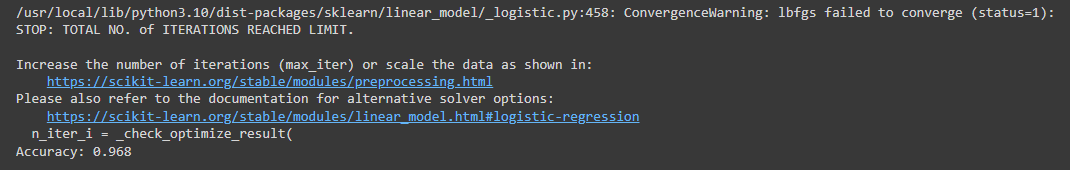

Isso quer dizer, de forma simples, que após um certo número de iterações o resultado não mudou significativamente, e a iteração foi forçada a parar pelo sklearn. Vamos observar o que temos nas listas

In [ ]:
print(len(y_pred), len(y_true))

No entanto, não precisamos fazer um loop deste jeito para rodar um LOOCV (pelo menos no scikit learn). Vamos rodar de outra forma a mesma coisa com um banco de dados menor, para reduzir o tempo de execução. Leia também o seguinte documento do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [ ]:
from numpy import mean # Média
from numpy import std # Desvio Padrão
from sklearn.datasets import make_blobs # Para criar bancos de dados fictícios
from sklearn.model_selection import cross_val_score # Pipeline de cross-validation do SKLEARN

# Criando um banco de dados fictício com 100 observações
X_blob, y_blob = make_blobs(n_samples=100, random_state=42)

# Salvando a técnica de LOOCV em uma variável
LOOCV = LeaveOneOut()

# Criando o modelo
modelo = LogisticRegression(random_state = 42)

# evaluate model
scores = cross_val_score(modelo, # 1° - O modelo
                         X_blob, # 2° - Array de feature
                         y_blob, # 3° - Array de Target
                         scoring='f1_macro', # 4° - Métrica a ser utilizada (só pode uma, infelizmente)
                         cv=LOOCV, # 5° - Método de Validação (LOOCV)
                         n_jobs=-1)
# Performance do modelo
print(f'F1-score Macro médio: {mean(scores)}')
print(f'Desvio padrão do F1-Score Macro: {std(scores)}')

F1-score Macro médio: 1.0
Desvio padrão do F1-Score Macro: 0.0


**Lista de scorings para o cross_val_score** -> [Link](https://scikit-learn.org/stable/modules/model_evaluation.html)

### K-fold Cross-validation

A validação cruzada k-fold (K-fold cross-validation) é uma técnica de validação comum em machine learning que se diferencia do Leave-One-Out Cross-Validation (LOOCV) em como divide os dados para treinamento e teste. A principal diferença entre essas duas abordagens está na forma como os dados são particionados.

Aqui está uma explicação da validação cruzada k-fold e como ela se relaciona com o LOOCV:

* **Divisão dos Dados**: Em vez de dividir o conjunto de dados com base no númerode observações como no LOOCV, na validação cruzada k-fold, o conjunto de dados é dividido em k dobras (ou partições) aproximadamente iguais, onde k é um número escolhido com antecedência. Cada dobra contém uma fração igual dos dados.

* **Loop de Treinamento e Teste**: O modelo é treinado k vezes. Em cada iteração, uma das k dobras é usada como conjunto de teste, enquanto as outras k-1 dobras são usadas como conjunto de treinamento. O processo de treinamento e teste é repetido k vezes, de modo que cada dobra é usada uma vez como conjunto de teste.

* **Métricas de Avaliação**: Em cada iteração, métricas de avaliação, como precisão, erro quadrático médio, etc., são calculadas no conjunto de teste.

* **Resultados Agregados**: No final das k iterações, as métricas de avaliação de cada iteração são geralmente agregadas, geralmente calculando-se a média ou a mediana. Essa média ou mediana representa uma estimativa do desempenho do modelo.


O LOOCV é um caso especial de k-fold cross-validation, onde k é igual ao número de amostras no conjunto de dados. Isso significa que, no LOOCV, cada amostra é usada como um conjunto de teste individualmente, e o modelo é treinado nas outras amostras. Portanto, o LOOCV é uma variação da validação cruzada k-fold, onde k é igual ao número de amostras.


**Vantagens da K-fold Cross-Validation**:

1. É menos intensiva computacionalmente do que o LOOCV, uma vez que o número de iterações é limitado a k.

2. Fornece uma estimativa mais robusta do desempenho do modelo em comparação com uma única divisão de treinamento/teste, uma vez que usa diferentes subconjuntos para treinamento e teste.

3. Pode ser usado eficazmente em conjuntos de dados maiores, onde o LOOCV pode ser impraticável devido ao alto custo computacional.

**Desvantagens da K-fold Cross-Validation**:

1. A escolha do valor de k pode afetar a estimativa do desempenho do modelo. Um valor comum é k = 5 ou k = 10, mas a escolha pode variar dependendo do conjunto de dados e do problema.

2. Como os dados são divididos aleatoriamente em dobras, diferentes execuções do K-fold podem levar a estimativas ligeiramente diferentes do desempenho do modelo.

Em resumo, a validação cruzada k-fold é uma técnica de validação mais eficiente em termos de tempo e recursos computacionais em comparação com o LOOCV, enquanto ainda fornece uma estimativa sólida do desempenho do modelo. O LOOCV é uma variação especial da validação cruzada k-fold onde k é igual ao número de amostras no conjunto de dados. A escolha entre as duas abordagens depende do tamanho do conjunto de dados e das necessidades específicas do problema.

#### Exemplo

Vamos trabalhar com o mesmo banco de dados. Primeiro, importamos a técnica do Sci-kit learn e a salvamos como um objeto do Python

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10) # O default é 5

# Vamos checar o número de splits
kf.get_n_splits(X)

10

Aqui podemos ver que, diferente do LOOCV, o número de dobras (folds) não depende do tamanho de banco de dados, mas sim de um número pré-estabelecido pelo usuário. Vamos ver como ficaria a divisão do nosso banco de dados

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: indíces={train_index}")
  print(f"  Teste:  indíces={test_index}")

Dobra (Fold) 0:
  Treino: indíces=[ 301  302  303 ... 2999 3000 3001]
  Teste:  indíces=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: tamanho={len(train_index)}")
  print(f"  Teste:  tamanho={len(test_index)}")

Dobra (Fold) 0:
  Treino: tamanho=2701
  Teste:  tamanho=301
Dobra (Fold) 1:
  Treino: tamanho=2701
  Teste:  tamanho=301
Dobra (Fold) 2:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 3:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 4:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 5:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 6:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 7:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 8:
  Treino: tamanho=2702
  Teste:  tamanho=300
Dobra (Fold) 9:
  Treino: tamanho=2702
  Teste:  tamanho=300


Desta forma, podemos ver mais ou menos como nosso banco está dividido. Vamos fazer o loop da mesma forma que fizemos anteriormente, mas com algumas alterações:

**Nota: Novamente, esse é um código complexo com bastante coisa acontecendo ao mesmo tempo, tome seu tempo em entender o que acontece em cada uma das partes dele**

In [ ]:
# Importar algumas métricas para inserir no loop
from sklearn.metrics import precision_recall_fscore_support

# Criando um dataframe para salvar as métricas

resultados = pd.DataFrame()

# Loop de treinamento
for i, (train_index, test_index) in enumerate(kf.split(X)):

  # Dividir os dados entre treino e teste para este loop
  X_treino_kf, X_teste_kf = X[train_index, :], X[test_index, :]
  y_treino_kf, y_teste_kf = y[train_index], y[test_index]

  # Treinando o modelo
  modelo = LogisticRegression(random_state=42)
  modelo.fit(X_treino_kf, y_treino_kf)

  # Avaliação do modelo

  y_pred_kf = modelo.predict(X_teste_kf)

  # Guardando as métricas para esse fold

  metricas_kf = precision_recall_fscore_support(y_teste_kf, y_pred_kf, average=None, labels=[0, 1])

  # Desempacotando os valores

  precisao, revocacao, f1, suporte = metricas_kf

  # Crie um dicionário com os resultados

  metricas_dict = {
      'Precision': precisao,
      'Recall': revocacao,
      'F1-score': f1,
      'Fold':i
      }

  # Criando um dataframe com esse dicionário

  metricas = pd.DataFrame(metricas_dict)

  # Convertendo o index em uma coluna
  metricas.reset_index(inplace=True)

  # Renomeando essa coluna
  metricas = metricas.rename(columns = {'index':'Classe'})

  # Fazendo o append no banco criado fora do loop

  resultados = pd.concat([metricas,resultados],axis = 0)


# Resetando o indice do banco final e dropando a coluna gerada

resultados = resultados.reset_index(drop = True)



Agora, vamos ver os resultados:

In [ ]:
resultados

,Classe,Precision,Recall,F1-score,Fold
0,0,0.945274,0.940594,0.942928,9
1,1,0.878788,0.887755,0.883249,9
2,0,0.980000,0.920188,0.949153,8
3,1,0.830000,0.954023,0.887701,8
4,0,0.960452,0.988372,0.974212,7
5,1,0.983740,0.945312,0.964143,7
6,0,0.950893,0.946667,0.948775,6
7,1,0.842105,0.853333,0.847682,6
8,0,0.966667,0.962085,0.964371,5
9,1,0.911111,0.921348,0.916201,5


Vamos visualizar os resultados para entender quanta visualização temos no banco. Mas, primeiro, temos de arrumar a coluna de classe

In [ ]:

def condicao(x):
    if x == 1:
        return "Relevante"
    else:
        return "Irrelevante"


resultados['Classe'] = resultados['Classe'].apply(condicao)


**Precision**

<Figure size 1200x1200 with 0 Axes>

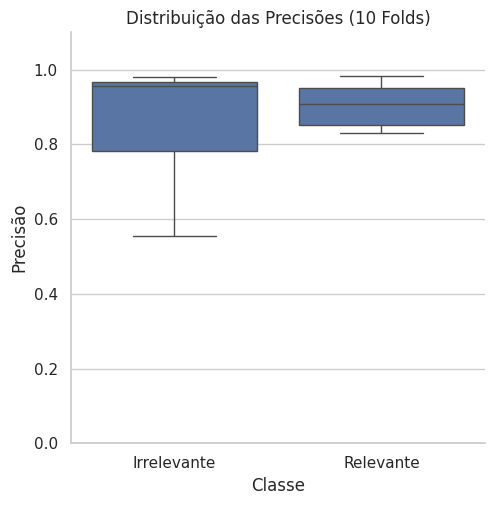

In [ ]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Precision", kind="box")
sns.despine()

plt.ylabel("Precisão")
plt.xlabel("Classe")
plt.title("Distribuição das Precisões (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

O gráfico de caixa apresenta a distribuição das precisões para as classes "Irrelevante" e "Relevante" em uma validação cruzada de 10 folds. A precisão para a classe "Irrelevante" tem uma mediana próxima de 1.0, indicando alto desempenho, mas com maior variabilidade, incluindo alguns valores abaixo de 0.8, o que sugere que em algumas execuções o modelo teve dificuldade nessa classe. Já para a classe "Relevante", a mediana da precisão é próxima de 0.9, com menor variabilidade, refletindo um desempenho mais consistente. Em geral, o modelo apresenta precisão alta e estável em ambas as classes, mas o desempenho para a classe "Irrelevante" mostra-se mais inconsistente, com maior dispersão de valores.

**Recall**

<Figure size 1200x1200 with 0 Axes>

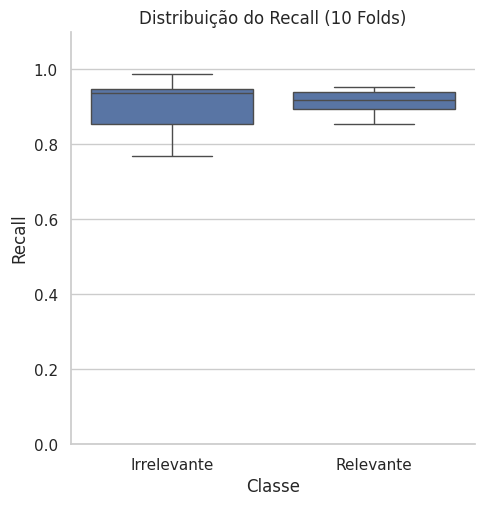

In [ ]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Recall", kind="box")
sns.despine()

plt.ylabel("Recall")
plt.xlabel("Classe")
plt.title("Distribuição do Recall (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

Para o recall, temos uma situação parecida com precision: Maior variação na classe irrelevante, mas ainda assim bons resultados em ambas as classes.

**F1-Score**

<Figure size 1200x1200 with 0 Axes>

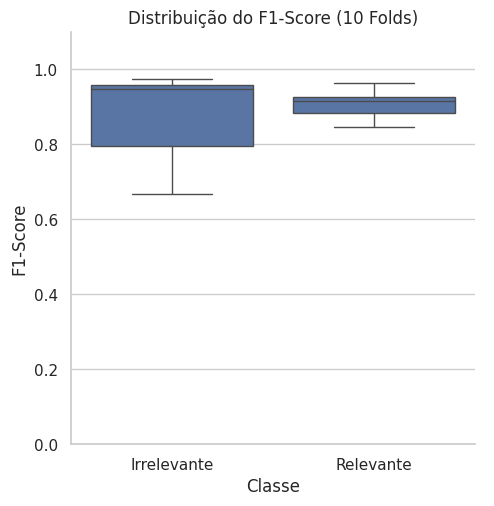

In [ ]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="F1-score", kind="box")
sns.despine()

plt.ylabel("F1-Score")
plt.xlabel("Classe")
plt.title("Distribuição do F1-Score (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

**Conclusão**: Com base neste K-fold, podemos concluir que há maior variação aleatória dos resultados no que se refere à classe irrelevante, tornando-os relativamente menos confiáveis. No entanto, os resultados para ambas as classes são bons, e o modelo parece conseguir discernir a classe relevante da irrelevante.

### Treino/Teste + Kfold

Por fim, se quisermos ter uma maior confiança de que nossos resultados se generalizarão para outras amostras, podemos ainda juntar a técnica de divisão entre treino e teste com o K-fold Cross-Validation.

A vantagem de combinar métodos de validação de treino/teste com validação cruzada k-fold é obter uma estimativa mais robusta e confiável do desempenho do seu modelo. Isso é conhecido como "nested cross-validation" (validação cruzada aninhada) e envolve o uso de validação com Treino/Teste no nível mais externo para avaliar o desempenho geral do modelo e validação cruzada k-fold no nível interno para ter certeza da variabilidade com os dados de treinamento.

Aqui estão as principais vantagens de usar essa abordagem combinada:

* **Estimativa robusta do desempenho do modelo**: A validação cruzada aninhada combina a robustez da validação cruzada k-fold no treinamento do modelo com a avaliação do desempenho em divisões de treinamento/teste no nível externo. Isso ajuda a garantir que o modelo seja avaliado de maneira confiável em diferentes conjuntos de dados de teste.

* **Seleção de hiperparâmetros confiável**: No nível interno da validação cruzada k-fold, você ajusta os hiperparâmetros do modelo em várias divisões do conjunto de treinamento. Isso ajuda a escolher os melhores hiperparâmetros, tornando o modelo mais adequado e geralmente com melhor desempenho.

* **Redução de overfitting**: O uso de validação cruzada aninhada ajuda a evitar o overfitting, uma vez que o ajuste dos hiperparâmetros é feito em conjuntos de dados de treinamento diferentes em cada iteração do k-fold. Isso garante que o modelo seja mais robusto e geral.

* **Confiança na estimativa de capacidade de generalização**: A combinação de validação cruzada aninhada fornece uma estimativa mais precisa da capacidade de generalização do modelo, o que é fundamental em tarefas de previsão.

Portanto, ao usar a validação cruzada aninhada, você está obtendo uma avaliação mais robusta do desempenho do modelo e uma seleção de hiperparâmetros confiável, o que é especialmente importante em situações onde a confiabilidade da avaliação é crítica. Isso pode ser útil ao escolher entre diferentes algoritmos ou ao afinar os hiperparâmetros para garantir que seu modelo funcione bem em novos dados. Isso se tornará ainda mais importante quando chegarmos nos modelos de aprendizado profundo.

##### Divisão Treino/Teste

Vamos voltar e dividir o banco entre treino e teste:

In [ ]:
# Divide os dados em features (X) e target (y)
X = df_ex['texto_processado']
y = df_ex['relevance_dummy']

# Desempacotando cada parte com o train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, # Vetor de variáveis explicativas
                                                        y, # Target (Ou Var. Dep.)
                                                        test_size=0.2, # Porcentagem que vai ficar para teste (20%)
                                                        random_state=42) # Seed para garantir a estabilidade dos resultados

In [ ]:
y_treino.value_counts(normalize=True)

,proportion
relevance_dummy,
0,0.538526
1,0.461474


In [ ]:
y_teste.value_counts(normalize=True)

,proportion
relevance_dummy,
0,0.502496
1,0.497504


#### Treinamento + KFold

Agora, diferente do exemplo anterior, teremos apenas 80% das observações para treino e, portanto, menos observações por fold:

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X_treino)):
  print(f"Dobra (Fold) {i}:")
  print(f"  Treino: tamanho={len(train_index)}")
  print(f"  Teste:  tamanho={len(test_index)}")

Dobra (Fold) 0:
  Treino: tamanho=2160
  Teste:  tamanho=241
Dobra (Fold) 1:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 2:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 3:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 4:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 5:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 6:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 7:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 8:
  Treino: tamanho=2161
  Teste:  tamanho=240
Dobra (Fold) 9:
  Treino: tamanho=2161
  Teste:  tamanho=240


Agora, temos 2161 para treino e 240 para validação em cada uma das dobras. Vamos agora processar o X em BOW e treinar o modelo.

In [ ]:
# Criando o vetorizador, utilizando nossa lista de stop_words
vectorizer = CountVectorizer(stop_words=stop_words,
                             ngram_range=(1,1)) # Palavras serão tratadas individualmente (ngram = 1)

# Transformando a coluna de texto em BOW
X_treino = vectorizer.fit_transform(X_treino)

In [ ]:
# Antes, precisamos ajustar o formato de nossos inputs
Xtreino = X_treino # Só para diferenciar as duas partes do processo
ytreino = y_treino.to_numpy()  # Converter o DataFrame y em um array NumPy

# Criando um dataframe para salvar as métricas

resultados = pd.DataFrame()

# Loop de treinamento
for i, (train_index, test_index) in enumerate(kf.split(Xtreino)):

  # Dividir os dados entre treino e teste para este loop
  X_treino_kf, X_teste_kf = Xtreino[train_index, :], Xtreino[test_index, :]
  y_treino_kf, y_teste_kf = ytreino[train_index], ytreino[test_index]

  # Treinando o modelo
  modelo = LogisticRegression(random_state=42)
  modelo.fit(X_treino_kf, y_treino_kf)

  # Avaliação do modelo

  y_pred_kf = modelo.predict(X_teste_kf)

  # Guardando as métricas para esse fold

  metricas_kf = precision_recall_fscore_support(y_teste_kf,
                                                y_pred_kf,
                                                average=None,
                                                labels=[0, 1],
                                                zero_division = True)

  # Desempacotando os valores

  precisao, revocacao, f1, suporte = metricas_kf

  # Crie um dicionário com os resultados

  metricas_dict = {
      'Precision': precisao,
      'Recall': revocacao,
      'F1-score': f1,
      'Fold':i,
      'suporte': suporte
      }

  # Criando um dataframe com esse dicionário

  metricas = pd.DataFrame(metricas_dict)

  # Convertendo o index em uma coluna
  metricas.reset_index(inplace=True)

  # Renomeando essa coluna
  metricas = metricas.rename(columns = {'index':'Classe'})

  # Fazendo o append no banco criado fora do loop

  resultados = pd.concat([metricas,resultados],axis = 0)


# Resetando o indice do banco final e dropando a coluna gerada

resultados = resultados.reset_index(drop = True)


Vamos ver os resultados do treinamento

In [ ]:
resultados

,Classe,Precision,Recall,F1-score,Fold,suporte
0,0,0.941176,0.934307,0.937729,9,137
1,1,0.913462,0.922330,0.917874,9,103
2,0,0.932331,0.932331,0.932331,8,133
3,1,0.915888,0.915888,0.915888,8,107
4,0,0.907692,0.967213,0.936508,7,122
5,1,0.963636,0.898305,0.929825,7,118
6,0,0.944882,0.967742,0.956175,6,124
7,1,0.964602,0.939655,0.951965,6,116
8,0,0.929577,0.956522,0.942857,5,138
9,1,0.938776,0.901961,0.920000,5,102


In [ ]:
resultados[resultados['Classe']==0].mean()

,0
Classe,0.000000
Precision,0.919258
Recall,0.941433
F1-score,0.930084
Fold,4.500000
suporte,129.300000


In [ ]:
resultados[resultados['Classe']==1].mean()

,0
Classe,1.000000
Precision,0.930888
Recall,0.905094
F1-score,0.917632
Fold,4.500000
suporte,110.800000


Ajeitando os resultados novamente:

In [ ]:
def condicao(x):
    if x == 1:
        return "Relevante"
    else:
        return "Irrelevante"


resultados['Classe'] = resultados['Classe'].apply(condicao)

Vamos verificar a precision, recall e f1-score

**Precision**

<Figure size 1200x1200 with 0 Axes>

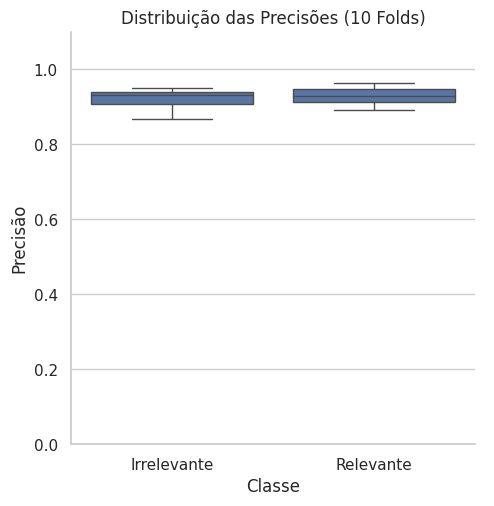

In [ ]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Precision", kind="box")
sns.despine()

plt.ylabel("Precisão")
plt.xlabel("Classe")
plt.title("Distribuição das Precisões (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

**Recall**

<Figure size 1200x1200 with 0 Axes>

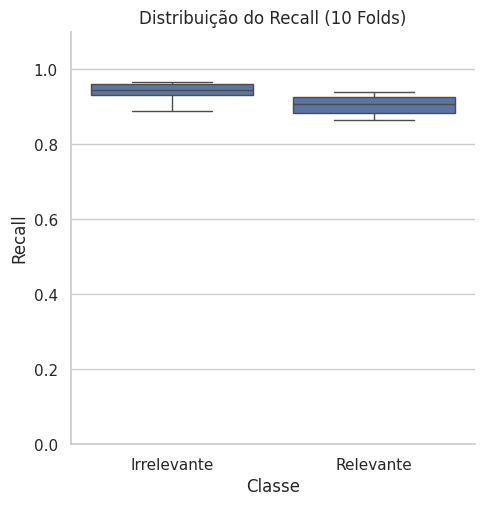

In [ ]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="Recall", kind="box")
sns.despine()

plt.ylabel("Recall")
plt.xlabel("Classe")
plt.title("Distribuição do Recall (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

<Figure size 1200x1200 with 0 Axes>

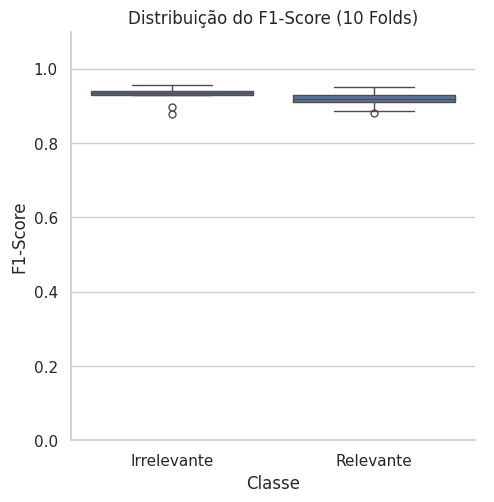

In [ ]:
# Configure o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(12, 12))  # Ajuste o tamanho do gráfico, se necessário
sns.catplot(data=resultados, x="Classe", y="F1-score", kind="box")
sns.despine()

plt.ylabel("F1-Score")
plt.xlabel("Classe")
plt.title("Distribuição do F1-Score (10 Folds)")
plt.ylim(0, 1.1)

plt.show()

Há uma menor variação no precision, mas nada drástico. Os outros resultados se mantém. Agora, vamos verificar os resultados no banco de teste. Primeiro, temos de rodar o treinamento de novo com todos os dados do banco de treino, dado que não temos um modelo salvo no sistema.

In [ ]:
modelo = LogisticRegression() # Modelo de Regressão Logística do SkLearn

# Treinando o modelo
modelo.fit(X_treino, y_treino) # Colocamos os vetores de treino para o modelo utilizando o método '.fit'

LogisticRegression()

Prever no banco de teste

In [ ]:
X_teste = vectorizer.transform(X_teste) # Transformamos o banco de teste em BOW

In [ ]:
y_pred = modelo.predict(X_teste)


y_pred # Nosso array de previsões

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,

E avaliar o modelo novamente

In [ ]:
rel_class = classification_report(y_teste, y_pred)

print(f"Relatório de Classificação:\n{rel_class}")

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       302
           1       0.95      0.93      0.94       299

    accuracy                           0.94       601
   macro avg       0.94      0.94      0.94       601
weighted avg       0.94      0.94      0.94       601



Vemos que os resultados obtido no banco de teste são parecidos com os obtidos no treinamento. Isso nos dá maior confiança de que os resultados são estáveis e, portanto confiáveis. Isso garante que o resultado obtido por nós não foi uma anomalia estatística, garantindo a reprodutibilidade de nossos resultados.

Hipoteticamente, poderíamos ter obtido um resultado fantástico, que nos deixasse muito otimistas. No entanto, se fosse um resultado de apenas uma iteração, esse resultado poderia ser erronêo e, quando outros pesquisadores (ou nós mesmos) fossem replicar o estudo, poderiam obter resultados muito piores, que não condizem com o que diziamos ter obtido. Por isso, é importante fazer a validação dos resultados, tanto por uma questão de reprodutibilidade dos achados quanto por uma questão de precaução, não nos deixando levar por falsos resultados.

## Exercícios

Agora, vocês vão fazer a classificação de sentimento (['Corrected_sentimento]) do banco.

1 - Filtre somente as observações relevantes do banco e salve as colunas de interesse (texto e sentimento) em duas variáveis: X (features) e y (target).

2 - Qual a distribuição de classes em Sentimento?

3 - Junte as classes "Positive" e "Unclear" em uma só. A classificação deve ser binária entre "Negativo" e "Não Negativo".

4 - Faça a divisão entre teste e treino, deixando 20% para teste. Não esqueça de estabelecer uma seed (random_state) de 42.

5 - Transforme o X_treino em uma Bag-Of-Words.

6 - Apresente quantas observações ficarão para treino e validação em cada uma das dobras (folds):

7 - Qual a distribuição de classes no y_treino e no y_teste?

8 - Faça o loop de treinamento com um k-fold com 10 folds

9 - Apresente o dataframe de resultados

10 - Apresente a distribuição da Precision

11 - Discuta os resultados de precision pensando na variância dos valores para cada uma das classes:

RESPOSTA:

12 - Apresente a distribuição do Recall

13 - Discuta os resultados do recall pensando na variância dos valores para cada uma das classes:

RESPOSTA:

14 - Apresente a distribuição dos F1-Scores

15 - Discuta os resultados do f1-score pensando na variância dos valores para cada uma das classes:

RESPOSTA:

16 - Treine o modelo com o banco de treino e prediza os valores no banco de teste (Não esqueça de vetorizar o banco de teste separadamente):

17 - Apresente o relatório de classificação no banco de teste

18 - Discuta os resultados encontrados no exercício 17: Os valores se encontram dentro do esperado no K-fold Cross-validation? O que isso significa para nossa confiabilidade nos resultados?

RESULTADO: